In [12]:
###··· BANK DATASET ···### 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

# Part 1: Selecting and analyzing the dataset 
# #Load the dataset
bank_dataset = pd.read_csv("A2-bank/bank-additional-full.csv", sep=';', header=0)
#Drop unnused columns
bank_dataset.drop(["default", "day_of_week","pdays"], axis=1, inplace=True)

#Replace unknown values with the mode
for column in ["marital", "job", "education", "housing", "loan"]:
    bank_dataset[column].replace("unknown", bank_dataset[column].mode()[0], inplace=True)

#Give a numerical value to the categorical data
columns_to_factorize = ["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome", "y"]
for column in columns_to_factorize:
    bank_dataset[column], _ = pd.factorize(bank_dataset[column])


x_train = bank_dataset[["job", "marital", "education", "housing", "loan", "contact", "month", "duration", "campaign", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
y_train = bank_dataset[["y"]]

# Scale the dat
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y_train, test_size=0.2, shuffle=True)

In [30]:
# Part 2: Implementation of NN
from tensorflow import keras as keras
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Define the number of folds for cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits)

# Initialize lists to store the training and validation accuracies for each fold
train_accuracies = []
val_accuracies = []

# Perform cross-validation
for train_index, val_index in kf.split(x_train):
    # Split the data into training and validation sets
    x_train_block, x_val_block = x_train[train_index], x_train[val_index]
    y_train_block, y_val_block = y_train.iloc[train_index], y_train.iloc[val_index]

    # Create the model
    model = keras.models.Sequential([
        keras.layers.Dense(20, input_shape=(x_train.shape[1],), activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.0005, ema_momentum=0.005)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    # Train the model
    history = model.fit(x_train_block, y_train_block, epochs=50, validation_data=(x_val_block, y_val_block), verbose=2)

    # Store the training and validation accuracies for this fold
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

# Plot the training and validation accuracies for each fold
plt.plot(range(1, n_splits + 1), train_accuracies, marker='o', label='Train')
plt.plot(range(1, n_splits + 1), val_accuracies, marker='o', label='Validation')
plt.title('Model accuracy (Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.legend()
plt.show()

Epoch 1/50
824/824 - 2s - loss: 0.3703 - accuracy: 0.8414 - val_loss: 0.2904 - val_accuracy: 0.8912 - 2s/epoch - 3ms/step
Epoch 2/50
824/824 - 1s - loss: 0.2833 - accuracy: 0.8931 - val_loss: 0.2690 - val_accuracy: 0.8959 - 1s/epoch - 2ms/step
Epoch 3/50
824/824 - 1s - loss: 0.2600 - accuracy: 0.8972 - val_loss: 0.2443 - val_accuracy: 0.9027 - 1s/epoch - 2ms/step
Epoch 4/50
824/824 - 1s - loss: 0.2356 - accuracy: 0.9025 - val_loss: 0.2243 - val_accuracy: 0.9056 - 1s/epoch - 2ms/step
Epoch 5/50
824/824 - 1s - loss: 0.2216 - accuracy: 0.9067 - val_loss: 0.2167 - val_accuracy: 0.9079 - 1s/epoch - 2ms/step
Epoch 6/50
824/824 - 1s - loss: 0.2164 - accuracy: 0.9075 - val_loss: 0.2131 - val_accuracy: 0.9082 - 1s/epoch - 2ms/step
Epoch 7/50
824/824 - 2s - loss: 0.2139 - accuracy: 0.9088 - val_loss: 0.2109 - val_accuracy: 0.9094 - 2s/epoch - 2ms/step
Epoch 8/50
824/824 - 2s - loss: 0.2120 - accuracy: 0.9085 - val_loss: 0.2081 - val_accuracy: 0.9115 - 2s/epoch - 2ms/step
Epoch 9/50
824/824 - 2s 

---Train---
Accuracy Score:  0.9160242792109257
---Test---
Accuracy Score:  0.9101723719349356
[[7091  226]
 [ 514  407]]


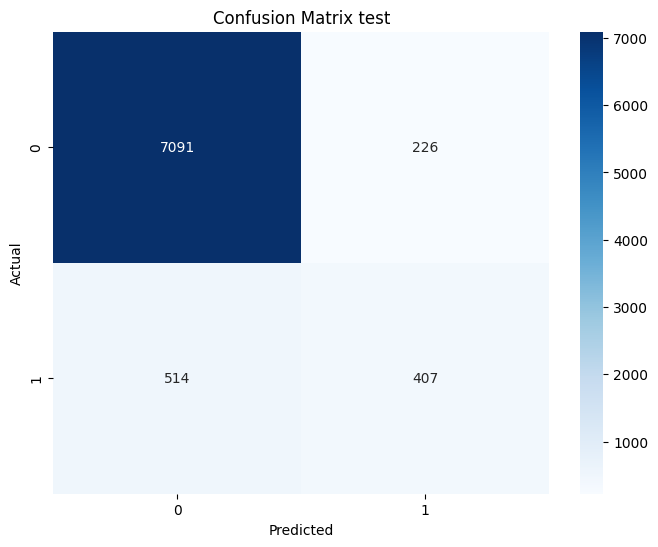

In [28]:
from sklearn.metrics import *
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
import numpy as np

# Part 3: Obtaining predictions
y_pred_train = (model.predict(x_train, verbose=0)[:, 0] > 0.5).astype(np.int8)
y_pred_test = (model.predict(x_test, verbose=0)[:, 0] > 0.5).astype(np.int8)
print("---Train---")
print("Accuracy Score: ", accuracy_score(y_train, y_pred_train))
print("---Test---")
print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

# Generate the confusion matrix

confusion = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
print(confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix test')
plt.show()


